In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
data = pd.read_csv('D:/Python/PG_2007_2017.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


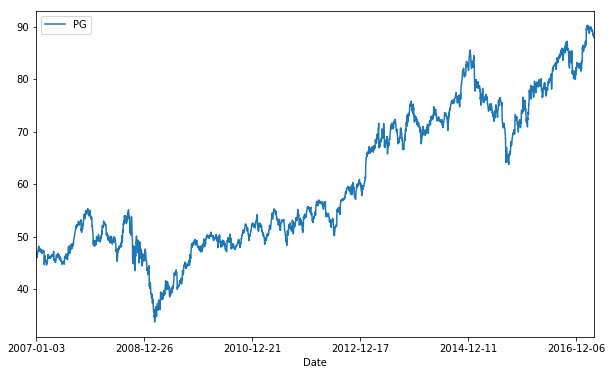

In [4]:
data.plot(figsize=(10, 6));

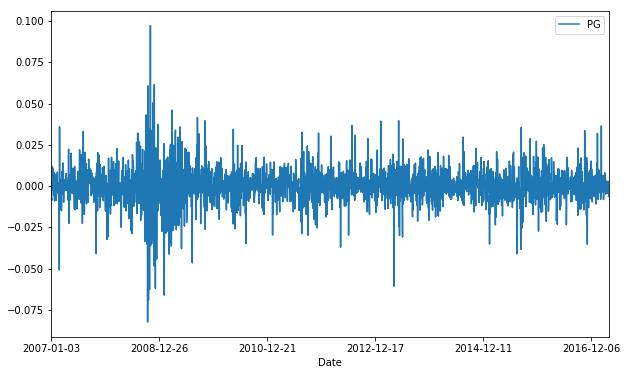

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([ 0.00018236])

In [13]:
drift.values

array([ 0.00018236])

In [14]:
stdev.values

array([ 0.0111381])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[ 0.47132479,  0.08531407],
       [ 0.51072934,  0.50375779],
       [ 0.73409692,  0.1212352 ],
       [ 0.60094627,  0.96586297],
       [ 0.98014547,  0.32032799],
       [ 0.53878868,  0.14529292],
       [ 0.05582532,  0.05339948],
       [ 0.36685184,  0.08290323],
       [ 0.21577918,  0.74350647],
       [ 0.96508677,  0.98935506]])

In [17]:
norm.ppf(x)

array([[-0.07194009, -1.3701883 ],
       [ 0.02689771,  0.00941953],
       [ 0.62525128, -1.1688343 ],
       [ 0.25579717,  1.82319372],
       [ 2.0567627 , -0.46678182],
       [ 0.0973825 , -1.05683733],
       [-1.59081753, -1.61274945],
       [-0.34020299, -1.38580498],
       [-0.78652777,  0.65419363],
       [ 1.81303471,  2.30280402]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.72883882, -0.0882565 ],
       [-1.58064538,  0.5800213 ],
       [ 0.47791305,  0.91298948],
       [-0.46551795, -1.0696389 ],
       [-0.27818522, -0.11516281],
       [ 1.80478776, -0.42187797],
       [ 1.12609534, -1.428441  ],
       [ 0.29404411,  0.9340973 ],
       [-1.58663016, -0.15120712],
       [ 0.02932001,  1.34750991]])

In [19]:
t_intervals = 1000
iterations = 10

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[ 1.01660262,  0.99213972,  1.00355569, ...,  1.00913618,
         1.01210622,  1.01108451],
       [ 0.99108915,  1.01661382,  1.03549109, ...,  0.98754336,
         1.00948462,  0.99819515],
       [ 0.99549335,  0.98606053,  1.00510273, ...,  0.99754064,
         0.99220096,  0.99560581],
       ..., 
       [ 0.98246185,  1.00262755,  0.99763003, ...,  0.99951341,
         0.98851112,  1.01562281],
       [ 0.98420191,  1.01598803,  0.99857743, ...,  0.97783141,
         1.00981504,  0.99658367],
       [ 1.00679729,  1.01357302,  1.00351349, ...,  1.01885772,
         1.00751796,  0.98646586]])